In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re
!pip install wordcloud
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/satvik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df = pd.read_csv(r"/Users/satvik/Downloads/amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [8]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [18]:
print(f"Data Features: {data.columns.values}")

Data Features: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [21]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [22]:
df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback


In [23]:
df['length']=df['verified_reviews'].apply(len)

In [24]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [34]:
print(f"Review title: {df.iloc[10]['verified_reviews']}")
print(f"Reveiw actual length: {len(df.iloc[10]['verified_reviews'])}")
print(f"Reveiw length depicted: {df.iloc[10]['length']}")

Review title: "I sent it to my 85 year old Dad, and he talks to it constantly."
Reveiw actual length: 65
Reveiw length depicted: 65


In [35]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

## Analyzing "Rating" Column

In [36]:
len(df)

3150

In [38]:
print(f"Review rating count:\n {df['rating'].value_counts()}")

Review rating count:
 5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


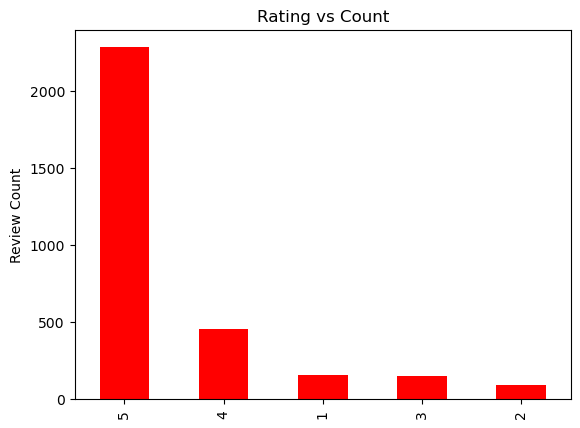

In [52]:
df['rating'].value_counts().plot.bar(color='red')
plt.ylabel('Review Count')
plt.title('Rating vs Count')
# plt.xlabel('Ratings')
plt.show()


In [55]:
print(f"Rating Percentage:\n {round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating Percentage:
 5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


([<matplotlib.patches.Wedge at 0x146229090>,
 [Text(-0.7162679836999994, 0.8348414074100169, '5'),
  Text(0.3263265873234325, -1.0504812984560183, '4'),
  Text(0.8721874839559163, -0.6702902302962863, '1'),
  Text(1.0358946368758761, -0.37003013565356685, '3'),
  Text(1.0949620616651607, -0.10515742253393694, '2')],
 [Text(-0.3906916274727269, 0.4553680404054637, '72.6%'),
  Text(0.1779963203582359, -0.5729897991578281, '14.4%'),
  Text(0.4757386276123179, -0.3656128528888834, '5.1%'),
  Text(0.5650334382959323, -0.20183461944740008, '4.8%'),
  Text(0.5972520336355421, -0.05735859410942014, '3.0%')])

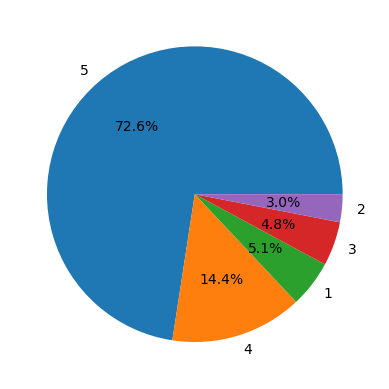

In [65]:
tags=df['rating'].value_counts()/df.shape[0]
plt.pie(tags, labels=df['rating'].value_counts().index, autopct='%1.1f%%')

## Analyzing 'feedback' column

In [68]:
print(f"Feedback Value Count:\n{df['feedback'].value_counts()}")

Feedback Value Count:
1    2893
0     257
Name: feedback, dtype: int64


#### So here we have 2 values in the 'feedback' column- 0 and 1, Let's see what they correspond to

In [70]:
review_0=df[df['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [71]:
review_1=df[df['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


from the above examples we can understand that 1 is positive review and 0 is negative review.

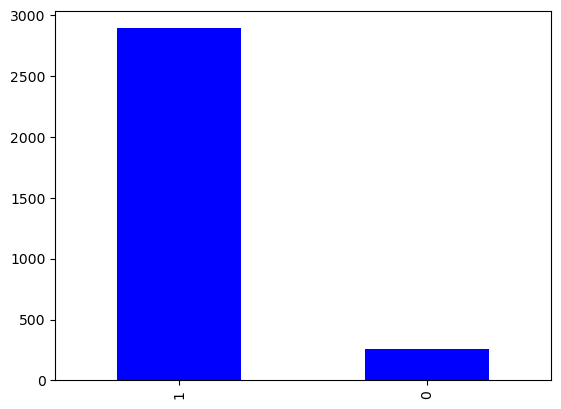

In [80]:
df['feedback'].value_counts().plot.bar(color='blue')
# plt.xlabel('Feedback')
# plt.ylabel('No. of Feedback')
# plt.title('Feedback distribution count')
plt.show()

In [82]:
print(f" Feedback Percentage distribution:\n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

 Feedback Percentage distribution:
1    91.84
0     8.16
Name: feedback, dtype: float64


So 91.84% reviews are Positive
and 8.16% reviews are Negative

([<matplotlib.patches.Wedge at 0x15076f150>,
 [Text(-1.0640640807577038, 0.27886848520631197, '1'),
  Text(1.0640640677029267, -0.27886853501874637, '0')],
 [Text(-0.580398589504202, 0.1521100828398065, '91.8%'),
  Text(0.5803985823834145, -0.15211011001022526, '8.2%')])

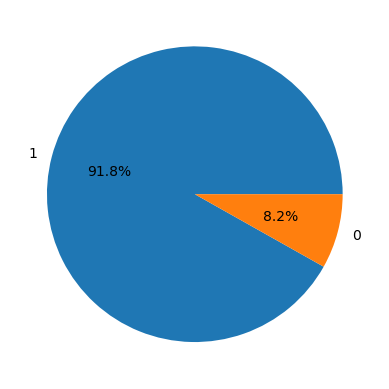

In [87]:
tags=df['feedback'].value_counts()/df.shape[0]
plt.pie(tags, labels=df['feedback'].value_counts().index, autopct='%1.1f%%')

### Understanding the rating column for different feedbacks

In [90]:
# Feedback =0
df[df['feedback']==0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [91]:
# Feedback =1
df[df['feedback']==1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

if the rating is 1 and 2 the feedback is Negative(0) and if the rating is 3,4,5 then the feedback is Positive(1)

# Analyzing "Variation" Column

In [94]:
print(f"Variation Count:\n{df['variation'].value_counts()}")

Variation Count:
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


Text(0.5, 1.0, 'Variation distribution count')

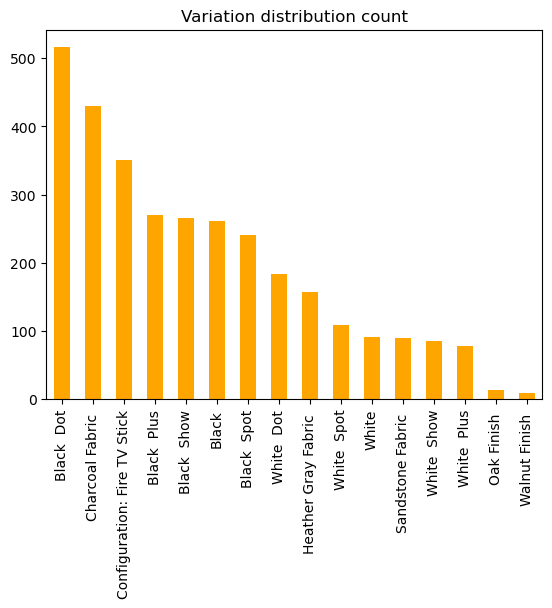

In [101]:
df['variation'].value_counts().plot.bar(color='orange')
plt.title('Variation distribution count')


In [105]:
# Percentage count of each variation
print(f"Variation Percentage:\n{round(df['variation'].value_counts()/df.shape[0]*100,2)}")

Variation Percentage:
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64


In [106]:
# Mean Rating grouped by Variation.

df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

Text(0.5, 1.0, 'Mean Rating According to Variation')

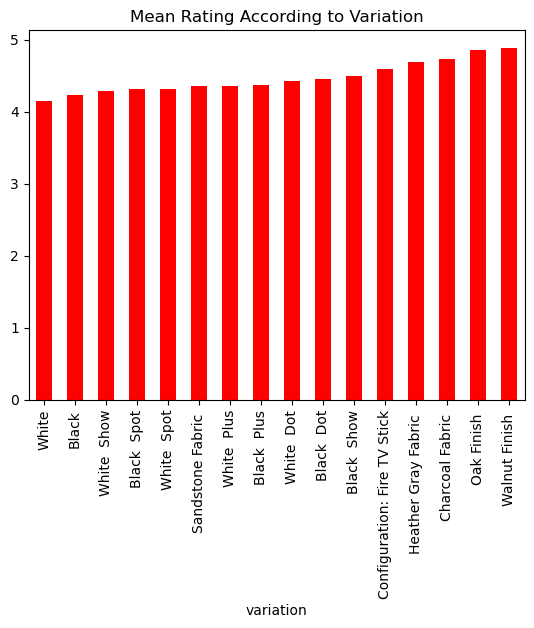

In [107]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color='red')
plt.title("Mean Rating According to Variation")

# Analyzing 'Verified Review Column'

In [108]:
df['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

Length Analysis for full dataset

[Text(0.5, 1.0, 'Distribution of length of review ')]

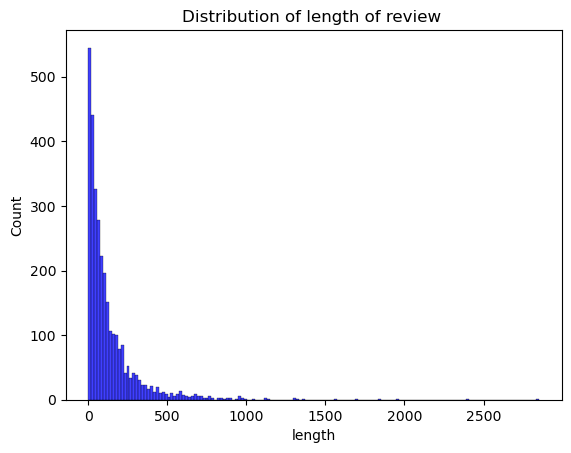

In [109]:
sns.histplot(df['length'],color='blue').set(title='Distribution of length of review ')


Length Analysis when feedback is 0(negative)

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

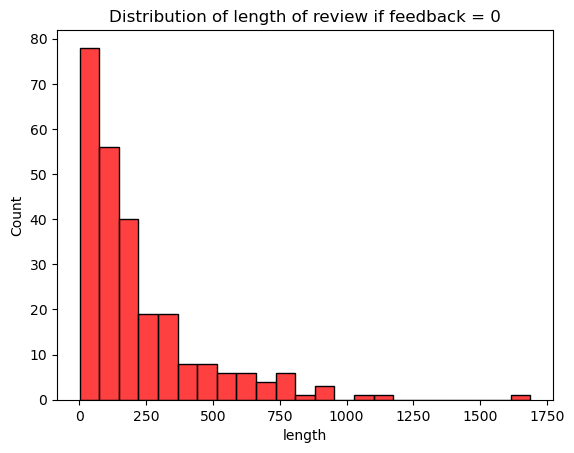

In [111]:
sns.histplot(df[df['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')


[Text(0.5, 1.0, 'Distribution of length of review if feedback =1')]

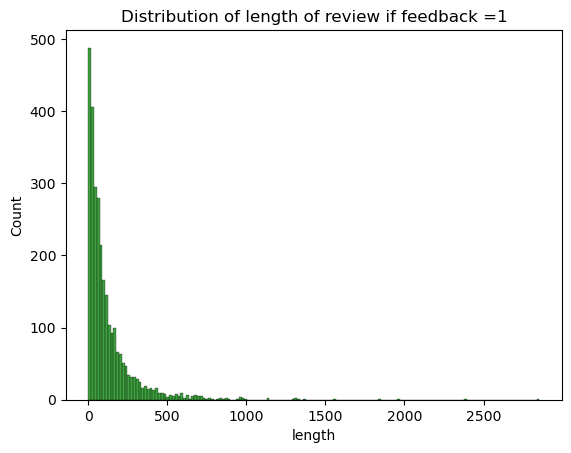

In [112]:
sns.histplot(df[df['feedback']==1]['length'],color='Green').set(title='Distribution of length of review if feedback =1')

Length wise mean Rating

Text(0.5, 1.0, ' Review length wise mean ratings')

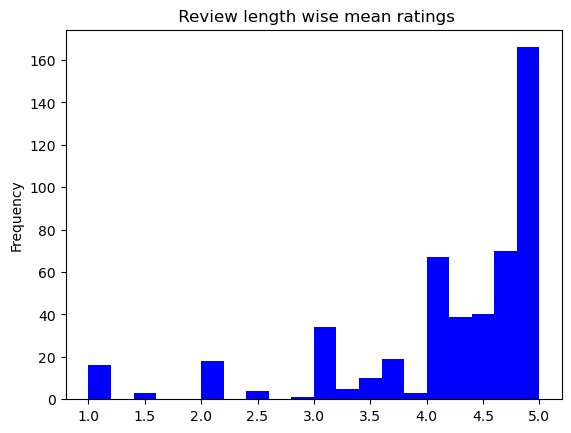

In [118]:
df.groupby('length')['rating'].mean().plot.hist(color='blue', bins=20)
plt.title(" Review length wise mean ratings")

Using Count Vectorizer

In [119]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df['verified_reviews'])

In [121]:
#Combining all reviews

reviews=" ".join([review for review in df['verified_reviews']])
print(reviews)

Love my Echo! Loved it! "Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home." "I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well." Music "I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do." "Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet." I think this is the 5th one I've purchased. I'm workin

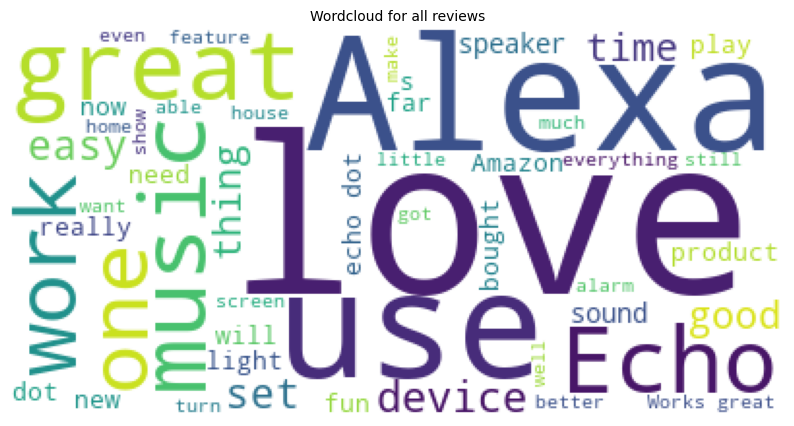

In [122]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [128]:
# Combine all reviews for each feedback category and splitting them into individual words

neg_reviews=" ".join([review for review in df[df['feedback']==0]['verified_reviews']])
neg_reviews=neg_reviews.lower().split()

pos_reviews=" ".join([review for review in df[df['feedback']==1]['verified_reviews']])
pos_reviews=pos_reviews.lower().split()

In [129]:
#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

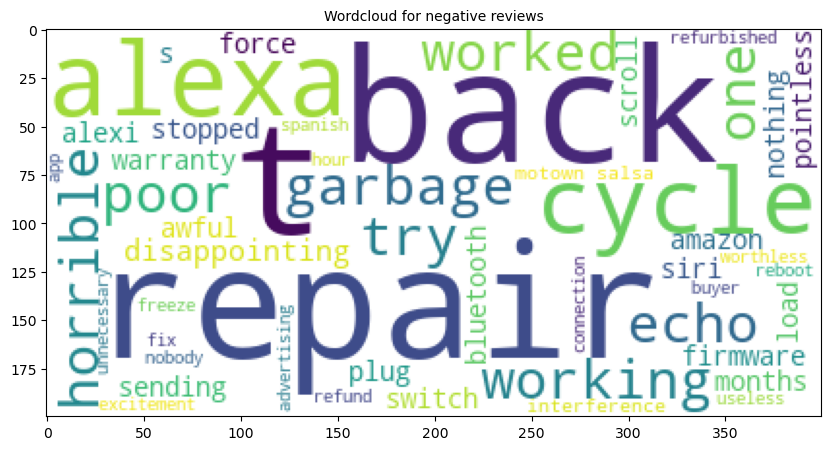

In [134]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud of Negative words
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.show()

Negative words can be seenin the above wordcloud as- back, garbage, repair, useless,pointless, horrible, poor, stopped etc

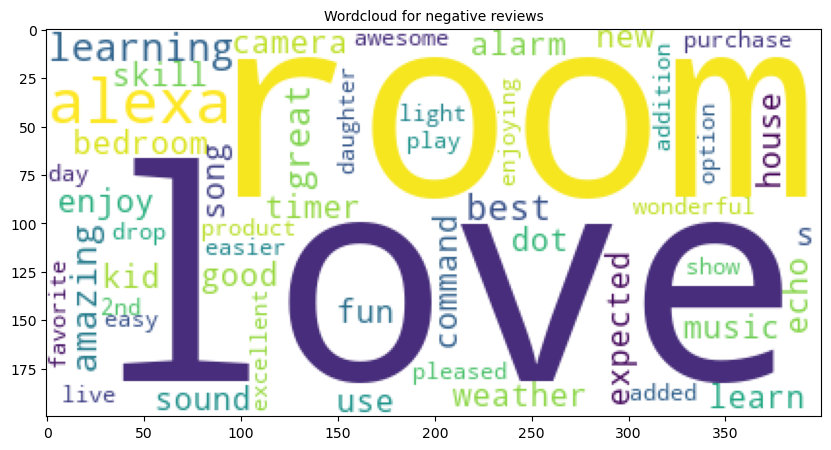

In [135]:
#Generate and create wordcloud of Positive words

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.show()

Positive words can be seen in the above word cloud - good, enjoying, amazing, best, great, love etc



# Processing & Modelling

To build the corpus from the 'verified_reviews' we perform the following -

1) Replace any non alphabet characters with a space
2) Covert to lower case and split into words
3) Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [136]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

Using Count Vectorizer to create bag of words



In [138]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [140]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3150, 2500)
y shape: (3150,)


Splitting the data into training and test set with 20% data in testing set and 80% data in training set

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2520, 2500)
y train: (2520,)
X test: (630, 2500)
y test: (630,)


Scaling the data so the range is between 0 and 1

In [142]:
scaler = MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

Random Forest Classifier

In [143]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [147]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scaled, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scaled, y_test))

Training Accuracy : 0.9944444444444445
Testing Accuracy : 0.9428571428571428


In [151]:
#Predicting on the test set
y_pred = model_rf.predict(X_test_scaled)

In [154]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

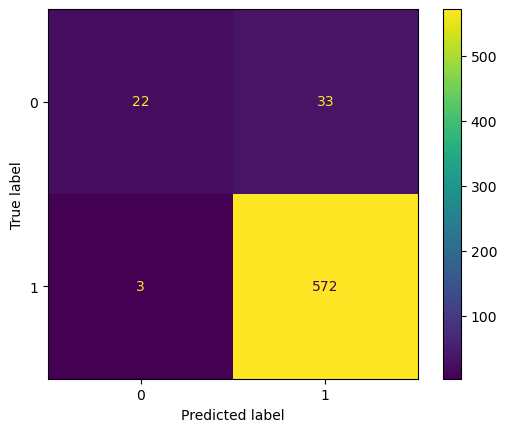

In [155]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()


K-fold Cross Validation

In [156]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scaled, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9361111111111111
Standard Variance : 0.010566291234678041


In [157]:
#Applying grid search to get the optimal parameters on random forest
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [159]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scaled, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [160]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 12, 'n_estimators': 300}


In [161]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_pred))

Cross validation mean accuracy on train set : 97.08829365079366
Cross validation mean accuracy on test set : 92.52480158730158
Accuracy score for test set : 0.9428571428571428


## XGBoost

In [162]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [163]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scaled, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scaled, y_test))

Training Accuracy : 0.9734126984126984
Testing Accuracy : 0.9317460317460318


In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

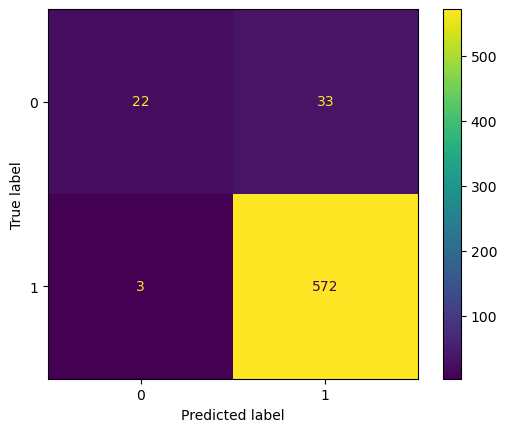

In [164]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

## Decision Tree Classifier

In [165]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [166]:
print("Training Accuracy:", model_dt.score(X_train_scaled,y_train))
print("Testing Accuracy:", model_dt.score(X_test_scaled,y_test))

Training Accuracy: 0.9944444444444445
Testing Accuracy: 0.9031746031746032


In [167]:
y_preds = model_dt.predict(X_test)

In [169]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 22  33]
 [  3 572]]


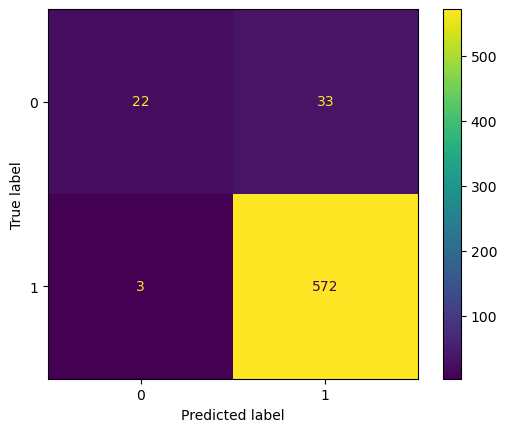

In [173]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()